In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import sys
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("train set of image: %d 개" % (X_train.shape[0]))
print("test set of image: %d 개" % (X_test.shape[0]))

train set of image: 60000 개
test set of image: 10000 개


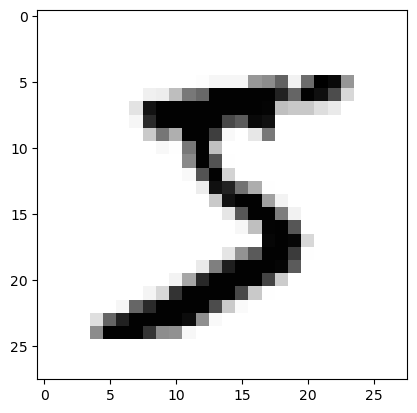

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [12]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write(' %3d ' % i)
    sys.stdout.write('\n')

   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127    0    0    0    0 
   0    0    0    0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64    0    0    0    0 
   0    0    

In [13]:
print(X_train[0].shape[0])

28


In [14]:
print(X_train[0].shape[1])

28


In [15]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train.astype(float)
X_train = X_train / 255 

In [17]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [19]:
X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [20]:
print(Y_train[0])

5


In [21]:
Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [22]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

In [30]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, 
                    batch_size = 200, verbose = 0, callbacks = [early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15740, saving model to ./model\01-0.1574.hdf5

Epoch 00002: val_loss improved from 0.15740 to 0.10346, saving model to ./model\02-0.1035.hdf5

Epoch 00003: val_loss improved from 0.10346 to 0.08591, saving model to ./model\03-0.0859.hdf5

Epoch 00004: val_loss improved from 0.08591 to 0.08045, saving model to ./model\04-0.0804.hdf5

Epoch 00005: val_loss improved from 0.08045 to 0.06856, saving model to ./model\05-0.0686.hdf5

Epoch 00006: val_loss improved from 0.06856 to 0.06566, saving model to ./model\06-0.0657.hdf5

Epoch 00007: val_loss did not improve from 0.06566

Epoch 00008: val_loss improved from 0.06566 to 0.06167, saving model to ./model\08-0.0617.hdf5

Epoch 00009: val_loss did not improve from 0.06167

Epoch 00010: val_loss did not improve from 0.06167

Epoch 00011: val_loss did not improve from 0.06167

Epoch 00012: val_loss did not improve from 0.06167

Epoch 00013: val_loss did not improve from 0.06167

Epoch 00014: val_lo

In [31]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9826
Test Accuracy: 0.9826


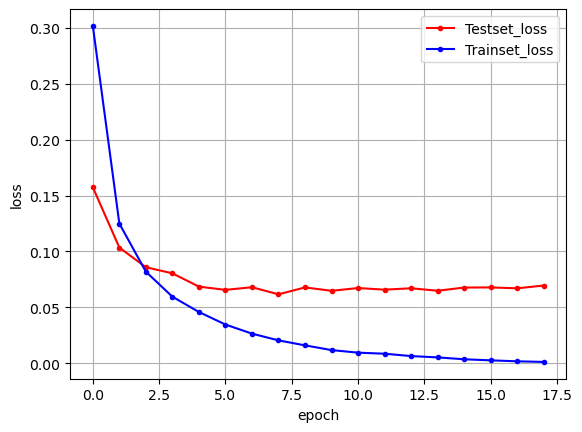

In [32]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()